# LSTM을 이용한 로이터 뉴스 카테고리 분류

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step
C:\Users\CPB06GameN\miniconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\CPB06GameN\miniconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
import warnings
warnings.filterwarnings('ignore')

### 데이터 탐색

In [4]:
# 데이터 확인하기
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), len(X_test))

46 카테고리
8982 2246


In [6]:
# 첫번째 뉴스기사
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
index_dict = {}
for key, value in reuters.get_word_index().items():
    index_dict[value] = key
len(index_dict)

30979

In [10]:
' '.join(index_dict[x] for x in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [12]:
print('뉴스 기사의 최대 길이:',max(len(x) for x in X_train))
print('뉴스 기사의 평균 길이:',sum(map(len, X_train)) / len(X_train))

뉴스 기사의 최대 길이: 2376
뉴스 기사의 평균 길이: 145.5398574927633


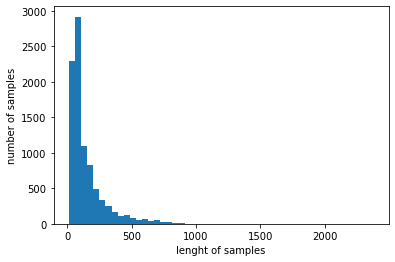

In [15]:
plt.hist([len(l) for l in X_train], bins=50)
plt.xlabel('lenght of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
plt.figsize=(12,5)
sns.countplot(y_train)
plt.show()

NameError: name 'sns' is not defined

### LSTM으로 로이터 뉴스 분류
- 단어: 빈도수 기분 1000까지 (총 단어수: 30,979)
- 문장길이: (최대 2,376 )

In [23]:
# 빈도수 3000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문장당 단어수 100
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [25]:
# 뉴스기사 레이블의  One-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [29]:
# Model 정의
model = Sequential([ 
    Embedding(3000, 100),
    LSTM(120),
    Dense(46, activation='softmax')                
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         360000    
_________________________________________________________________
lstm (LSTM)                  (None, 120)               115680    
_________________________________________________________________
dense (Dense)                (None, 46)                5566      
Total params: 481,246
Trainable params: 481,246
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# Callback 함수 정의
model_file = 'reuter-best-lstm.h5'
mc = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10)

In [33]:
# 모델 학습
history = model.fit(X_train, Y_train, batch_size=100, epochs=50,
                    validation_split=0.2, verbose=2,
                    callbacks=[mc,es])

Epoch 1/50

Epoch 00001: val_loss improved from inf to 2.37885, saving model to reuter-best-lstm.h5
72/72 - 8s - loss: 2.6485 - accuracy: 0.3464 - val_loss: 2.3789 - val_accuracy: 0.3450
Epoch 2/50

Epoch 00002: val_loss improved from 2.37885 to 2.07670, saving model to reuter-best-lstm.h5
72/72 - 8s - loss: 2.1244 - accuracy: 0.4653 - val_loss: 2.0767 - val_accuracy: 0.4758
Epoch 3/50

Epoch 00003: val_loss improved from 2.07670 to 1.81122, saving model to reuter-best-lstm.h5
72/72 - 8s - loss: 1.9388 - accuracy: 0.5083 - val_loss: 1.8112 - val_accuracy: 0.5442
Epoch 4/50

Epoch 00004: val_loss improved from 1.81122 to 1.75897, saving model to reuter-best-lstm.h5
72/72 - 8s - loss: 1.7707 - accuracy: 0.5491 - val_loss: 1.7590 - val_accuracy: 0.5565
Epoch 5/50

Epoch 00005: val_loss improved from 1.75897 to 1.67871, saving model to reuter-best-lstm.h5
72/72 - 8s - loss: 1.6710 - accuracy: 0.5681 - val_loss: 1.6787 - val_accuracy: 0.5793
Epoch 6/50

Epoch 00006: val_loss improved from 1

In [34]:
best_model = load_model(model_file)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 17ms/step - loss: 1.2727 - accuracy: 0.6915


[1.2726861238479614, 0.6914514899253845]

### 학습과정 시각화
- 하나의 X축, 두개의 Y축 스케일

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# 학습셋
y_acc = history.history['accuracy']
y_loss = history.history['loss']
# 검증셋
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']

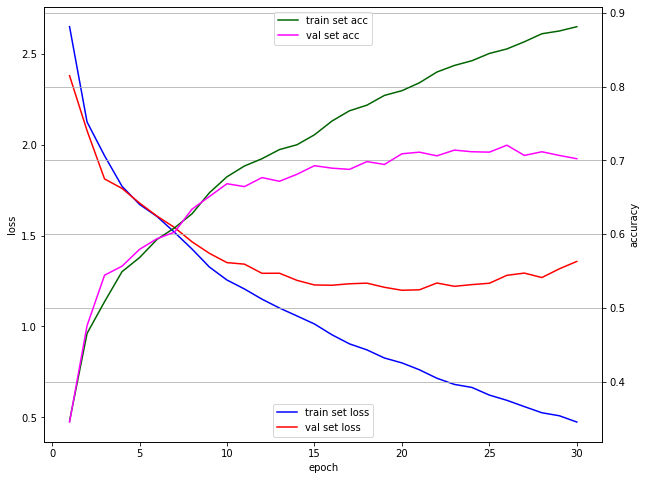

In [38]:
x_len = np.arange(1, len(y_acc)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='train set loss')
ax0.plot(x_len, y_vloss, c="red", label='val set loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='train set acc')
ax1.plot(x_len, y_vacc, c="magenta", label='val set acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='lower center')
ax1.legend(loc='upper center')
plt.grid()
plt.show()